In [1]:
from torch import nn
import matplotlib.pyplot as plt
from torchsummary import summary

import lightdde as dde
from essential import *
from qmodels import *

# Inference

In [2]:
data = dde.data.PDEData(
    domain=domain,
    pde=pde,
    bcs=[boundary_condition_u, boundary_condition_v, boundary_condition_right_p],
    exact_solution=[u_func, v_func, p_func],
    num_domain=2601,
    num_bc=400,
    num_test=5000,
)

# Models (pick one!)

## classic model

In [6]:
net = ClassicNet(in_dim=2, out_dim=3, hidden_dim=16)

model = dde.Model(
    data=data,
    model=net,
    save_path="models/classic_1000e_tanh/",
    log_every=10,
    save_every=100,
)

model.compile()

Loaded snapshot at epoch 1000


## FNN model

In [3]:
net = FNN()

model = dde.Model(
    data=data,
    model=net,
    save_path="models/FNN_1000e_tanh//",
    log_every=100,
    save_every=100,
)

model.compile()

Loaded snapshot at epoch 1000


## quantum model

In [7]:
net = QuantumNet(in_dim=2, out_dim=3, activation=nn.ReLU)

model = dde.Model(
    data=data,
    model=net,
    save_path="models/quantum_1000e_relu/",
    log_every=20,
    save_every=10,
)

model.compile()

Loaded snapshot at epoch 930


In [4]:
summary(net, input_size=(1, 2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 50]             150
              Tanh-2                   [-1, 50]               0
            Linear-3                   [-1, 50]           2,550
              Tanh-4                   [-1, 50]               0
            Linear-5                   [-1, 50]           2,550
              Tanh-6                   [-1, 50]               0
            Linear-7                   [-1, 50]           2,550
              Tanh-8                   [-1, 50]               0
            Linear-9                    [-1, 3]             153
Total params: 7,953
Trainable params: 7,953
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
-----------------------------------------------

# Plotting

Executed in 0.00 sec.


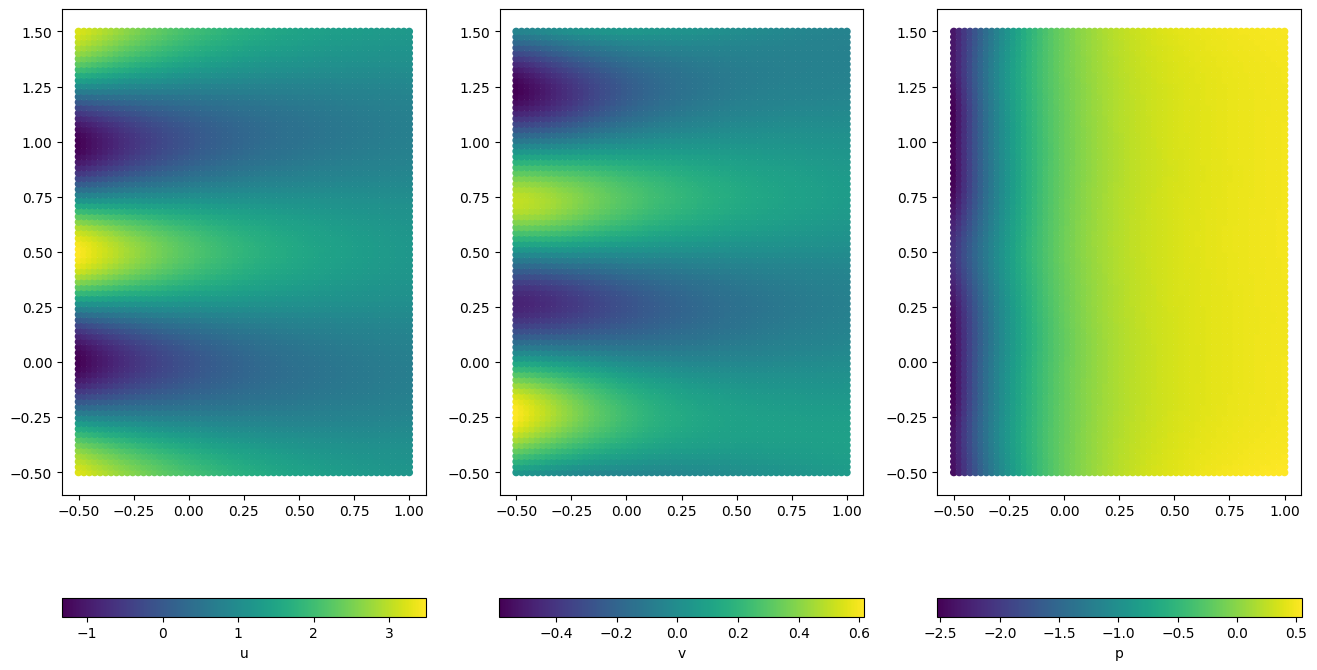

''

In [5]:
dde.scatter_plot(model, s=20)
;

# Load csv loss

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df_q = pd.read_csv("models/quantum_1000e_tanh/log.csv", index_col="epoch")
df_c = pd.read_csv("models/quantum_1000e_relu/log.csv", index_col="epoch")

In [28]:
df_q

,loss_train,u_err,v_err,p_err
epoch,,,,
20,6.667488,1.029987,0.634691,0.814426
40,4.700420,1.019061,0.474912,0.806727
60,3.515687,1.002963,0.356917,0.805214
80,2.874638,0.987574,0.286741,0.802304
100,2.538923,0.971233,0.256901,0.794252
120,2.323670,0.953957,0.245109,0.783643
140,2.156816,0.936742,0.237398,0.774771
160,2.016536,0.920153,0.231119,0.769365
180,1.892975,0.904293,0.226499,0.766992


In [29]:
len(df_q)

26

In [30]:
len(df_c)

46

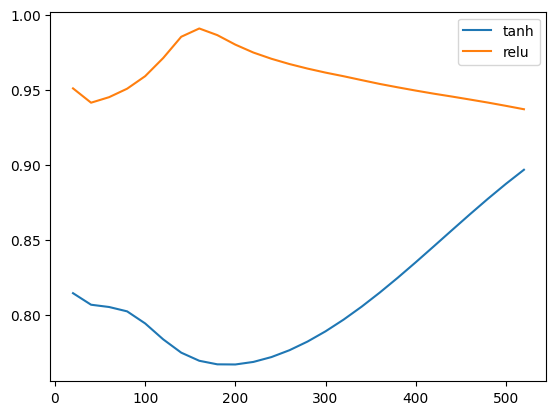

In [36]:
err = "p_err"
plt.plot(df_q.index, df_q[err], label="tanh")
plt.plot(df_c.index[:len(df_q)], df_c[err][:len(df_q)], label="relu")
plt.legend()
plt.show()